**<h1 align="center">Knock Airport Weather</h1>**

# <h1 align="center">Assignment 6</h1>

## <h1 align="center">By Sharon Curley</h1>

***

### Table of Contents


1. About the Assignment
2. Import Libraries
3. Load Data

4. Data Exploration
   
    4.1  Check for the DataFrame

    4.2  Check for the DataFrame dimensionality with pandas .info() method

    4.3  Generate descriptive statistics with pandas .describe method
    

5. Data Analysis
   
    5.1  Analysis: Part 1
     - 5.1.1 The temperature

     - 5.1.2 The mean temperature each day

     - 5.1.3 The mean temperature for each month
  
    5.2 Analysis: Part 2
 
     - 5.2.1 The Windspeed

     - 5.2.2 The rolling windspeed

     - 5.2.3 The max windspeed for each day
  
     - 5.2.4 The monthly mean of the daily max windspeeds
 
6.  References

### 1. About the Assignment
***
This assignment is to create plots from Knock Airport weather data found here https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Firstly,  plotting the following:

- The temperature
- The mean temperature each day
- The mean temperature for each month

Secondly,  plotting the following:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)




### 2. Import the Libraries
***

I imported the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.
- `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `datetime`: The datetime is a built-in module that provides classes for manipulating dates and times

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

### 3. Load the Data
***
Load the dataset from [the Knock Airport weather readings](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv)

In [60]:
df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23,na_values=["null","Null","nUlL"])

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\3372226478.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23,na_values=["null","Null","nUlL"])


### 4. Data Exploration
***


4.1 Check the dataframe

In [61]:
print(df)

                     date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind.3  wdsp ind.4  wddir  ww   w 

In [62]:
df.head(10)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


4.2  Check for the DataFrame dimensionality with pandas .info() method

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

4.3  Generate descriptive statistics with pandas .describe method


In [64]:
df.describe(include="all")

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
count,247674,247674.000000,247674.0,247674.000000,247674.00000,247674.000000,247674.000000,247674.000000,247674.000000,247674.000000,...,247674.000000,247674.0,247674.000000,247674.0,247674,247674,247674.000000,247674,247674.0,247674.0
unique,247674,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.0,NaN,75.0,133,83,NaN,166,283.0,20.0
top,10-apr-1996 14:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,210.0,,,NaN,,0.0,8.0
freq,1,NaN,158939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17374.0,NaN,10595.0,55079,55080,NaN,62174,64010.0,107119.0
mean,NaN,0.469747,NaN,0.020979,8.76682,0.033370,7.813635,6.713083,10.208093,87.943975,...,2.001284,NaN,2.001324,NaN,NaN,NaN,0.126385,NaN,NaN,NaN
std,NaN,0.986657,NaN,0.143653,4.60478,0.228232,4.215855,4.377861,3.010232,12.132171,...,0.092902,NaN,0.094837,NaN,NaN,NaN,0.366528,NaN,NaN,NaN
min,NaN,0.000000,NaN,0.000000,-6.90000,0.000000,-7.300000,-11.400000,0.000000,0.000000,...,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,0.000000,5.40000,0.000000,4.700000,3.500000,7.800000,82.000000,...,2.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,NaN,0.000000,8.80000,0.000000,8.000000,7.000000,10.000000,92.000000,...,2.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,0.000000,NaN,0.000000,12.00000,0.000000,11.000000,10.000000,12.200000,97.000000,...,2.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


### 5. Clean the data
***

5.1 Check for missing values

In [65]:
print(df.isna().sum())


date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


The above result is telling me there are no missing values, but there is according to the assignment brief. The blank cells in the DataFrame are not been recognized as NaN (missing values). Instead, they could be empty strings ("") or whitespace (" ").  

Using regular experssions, `r"^\s*$"`matches empty strings ("") and strings with only white spaces "\t". Inplace ensures that the replacement happens directly in the original DataFrame (df). 

In [66]:
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)


Check for missing values. The blank cells are now being recognised using `df.isna`

In [67]:
print(df.isna().sum())

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55079
w        55080
sun          0
vis      62174
clht        18
clamt       18
dtype: int64


5.2 Remove missing data

I want to remove missing data from my Datafrme using the dropna function

In [68]:
df.dropna(inplace=True)

Check for missing values again

In [69]:
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


The Dataframe is now clean - ready to analyse

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185424 entries, 0 to 247666
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    185424 non-null  object 
 1   ind     185424 non-null  int64  
 2   rain    185424 non-null  object 
 3   ind.1   185424 non-null  int64  
 4   temp    185424 non-null  float64
 5   ind.2   185424 non-null  int64  
 6   wetb    185424 non-null  float64
 7   dewpt   185424 non-null  float64
 8   vappr   185424 non-null  float64
 9   rhum    185424 non-null  int64  
 10  msl     185424 non-null  object 
 11  ind.3   185424 non-null  int64  
 12  wdsp    185424 non-null  object 
 13  ind.4   185424 non-null  int64  
 14  wddir   185424 non-null  object 
 15  ww      185424 non-null  object 
 16  w       185424 non-null  object 
 17  sun     185424 non-null  float64
 18  vis     185424 non-null  object 
 19  clht    185424 non-null  object 
 20  clamt   185424 non-null  object 
dtypes: float64(5), 

## 6.   Data Analysis

***

6.1  Analysis: Part 1

6.1.1 The temperature


I need to change the date object to datetime be able to manipulate the data.

In [72]:
df['date']

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
247662    31-oct-2024 13:00
247663    31-oct-2024 14:00
247664    31-oct-2024 15:00
247665    31-oct-2024 16:00
247666    31-oct-2024 17:00
Name: date, Length: 185424, dtype: object

In [89]:
print(df.columns)

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')


In [73]:
pd.to_datetime(df['date'])

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\1829355199.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247662   2024-10-31 13:00:00
247663   2024-10-31 14:00:00
247664   2024-10-31 15:00:00
247665   2024-10-31 16:00:00
247666   2024-10-31 17:00:00
Name: date, Length: 185424, dtype: datetime64[ns]

In [74]:
df["date"]= pd.to_datetime(df['date'])

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\306046315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


In [75]:
df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247662   2024-10-31 13:00:00
247663   2024-10-31 14:00:00
247664   2024-10-31 15:00:00
247665   2024-10-31 16:00:00
247666   2024-10-31 17:00:00
Name: date, Length: 185424, dtype: datetime64[ns]

In [88]:
print(df.columns)

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')


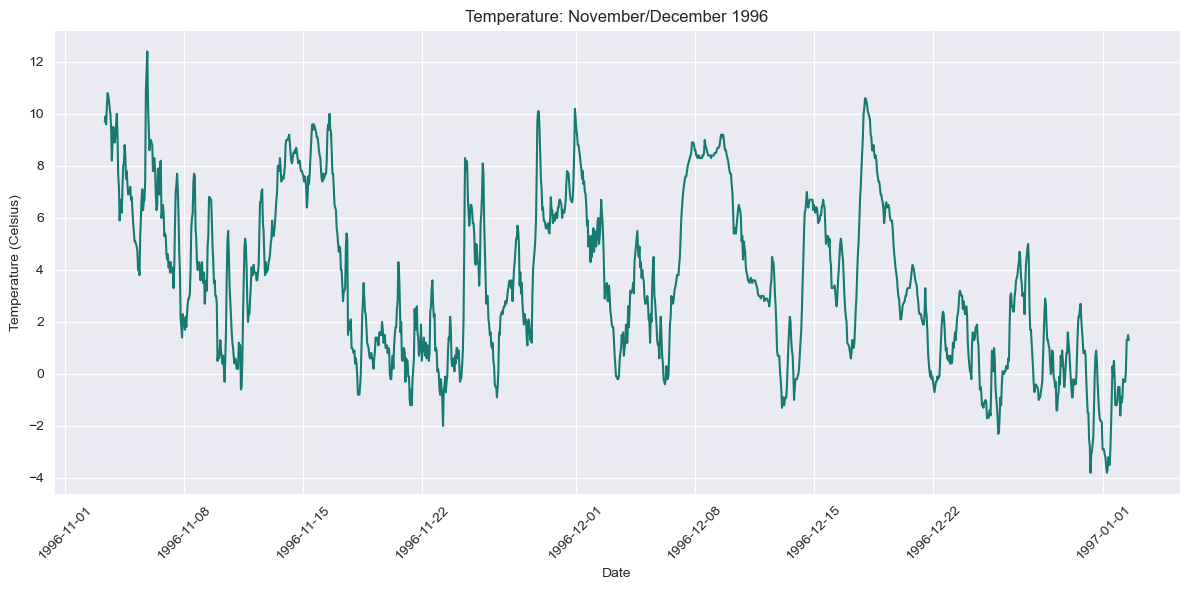

In [80]:
# November December 1996 - pulling out specific data rows to regenerate when index is re-set
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=df.iloc[2228:3659], x="date", y="temp").set(title="Temperature: November/December 1996",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
print(df.columns)

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')


In [85]:
df.set_index('date', inplace=True)      # use same df - inplace =True
df.head(3)

KeyError: "None of ['date'] are in the columns"

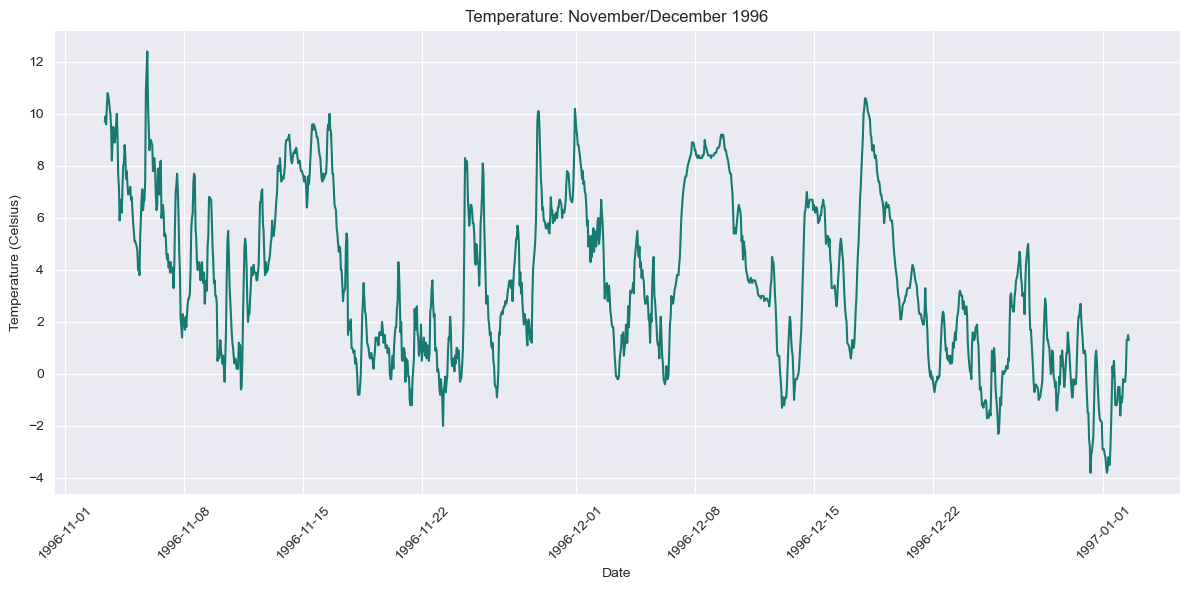

In [82]:
# same as above - did not expect any changes
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=df.iloc[2228:3659], x="date", y="temp").set(title="Temperature: November/December 1996",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

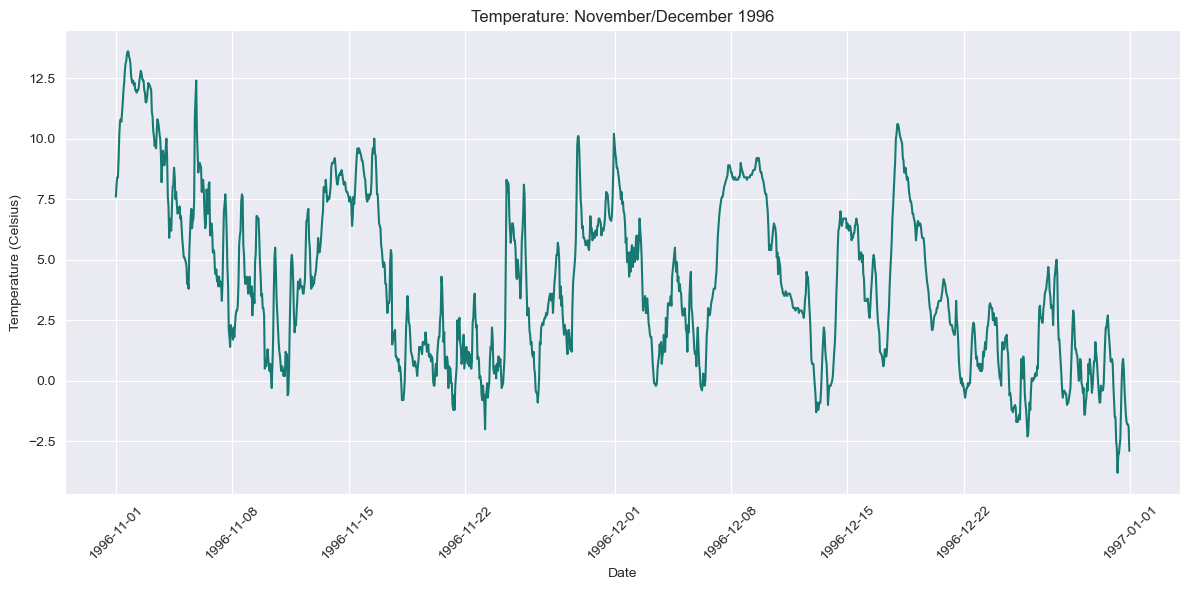

In [41]:
# But now I can use the datetime as a filter instead of having to know row numbers. Very handy
dateFrom = "1996-11-01 00:00:00"
dateTo = "1996-12-31 23:00:00"
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="temp").set(title="Temperature: November/December 1996",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Playing with mean -expected 4.129
#dateFrom = "1996-11-01 01:00:00"
#dateTo = "1996-12-31 01:00:00"
#df.loc[dateFrom:dateTo]['temp'].mean()

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\3212924702.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["temp"].resample("1y").mean()


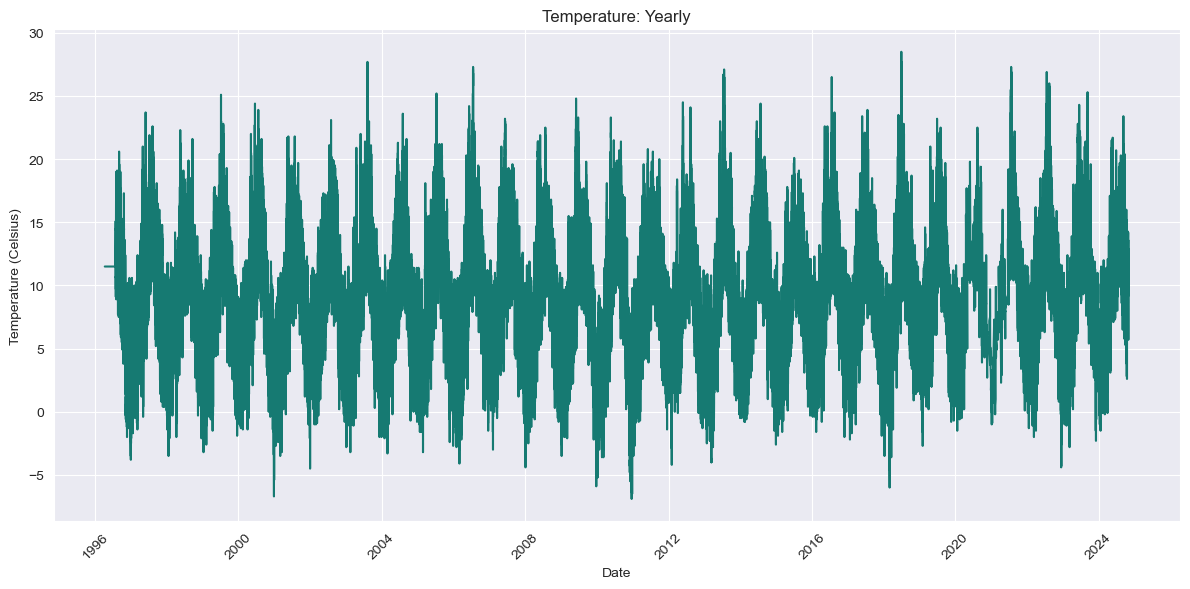

In [43]:
# Resample to yearly data to graph

df["temp"].resample("1y").mean()
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=df, x="date", y="temp").set(title="Temperature: Yearly",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6.1.2 The mean temperature each day


date
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-10-27     9.483333
2024-10-28    11.627273
2024-10-29    10.733333
2024-10-30    11.220000
2024-10-31    10.881818
Name: temp, Length: 10007, dtype: float64


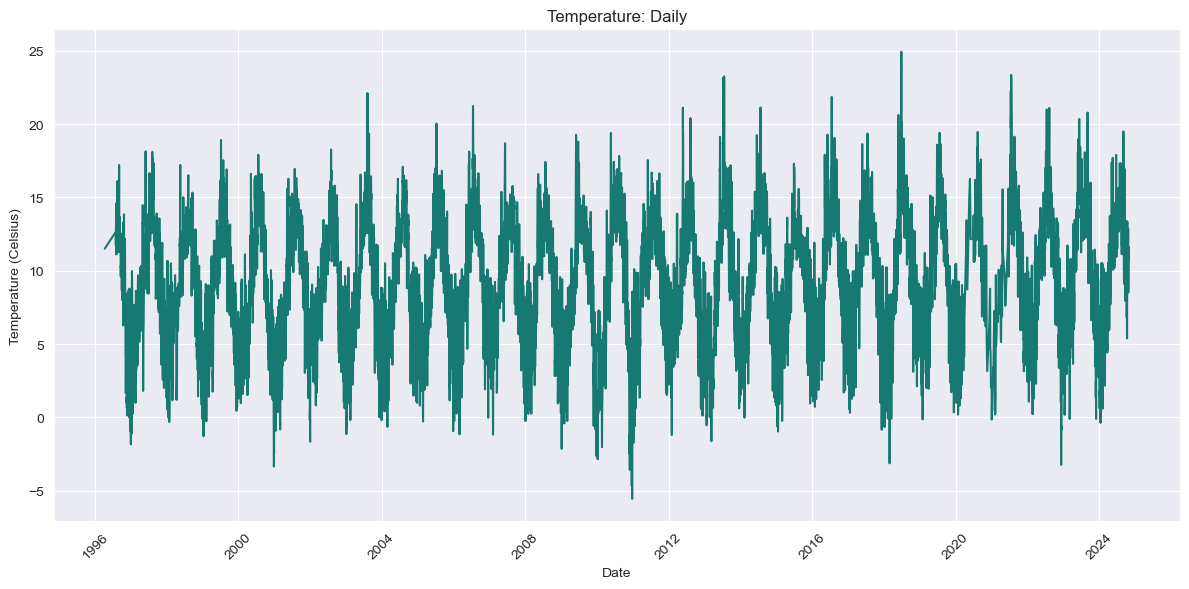

In [44]:
daily_mtemp=df["temp"].resample("D").mean().dropna()
print(daily_mtemp)
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=daily_mtemp).set(title="Temperature: Daily",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6.1.3 The mean temperature for each month

In [45]:
df["temp"].resample("M").mean().dropna()

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\3797913710.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["temp"].resample("M").mean().dropna()


date
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    13.019892
1996-09-30    12.175104
1996-10-31     9.794692
                ...    
2024-06-30    12.526197
2024-07-31    13.908791
2024-08-31    13.982432
2024-09-30    12.611111
2024-10-31    10.610345
Name: temp, Length: 341, dtype: float64

C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\2181163021.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mtemp = df["temp"].resample("M").mean().dropna()


date
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    13.019892
1996-09-30    12.175104
1996-10-31     9.794692
                ...    
2024-06-30    12.526197
2024-07-31    13.908791
2024-08-31    13.982432
2024-09-30    12.611111
2024-10-31    10.610345
Name: temp, Length: 341, dtype: float64


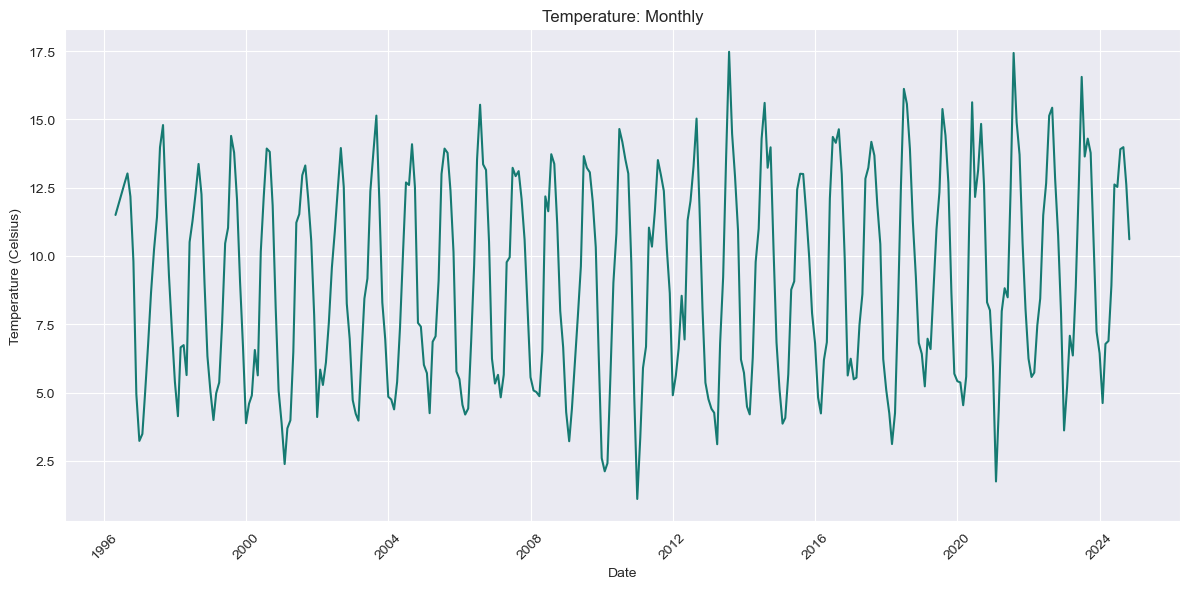

In [46]:
monthly_mtemp = df["temp"].resample("M").mean().dropna()
print(monthly_mtemp)
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=monthly_mtemp).set(title="Temperature: Monthly",xlabel="Date",ylabel="Temperature (Celsius)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6.2 Analysis: Part 2

6.2.1 The Windspeed


In [ ]:
# Check for missing data
#df = df.dropna(subset=['wdsp'])                 # Removes rows where the specified column has NaN.
#df = df[df['wdsp'].str.strip() != '']           # Removes rows where the column has empty strings

In [47]:
df.head(10)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,1010.9,0,0,0,0,1,82,0.0,40000,43,6
1996-07-31 13:00:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,1011.2,0,0,0,0,2,11,0.0,40000,43,5
1996-07-31 14:00:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,1011.3,0,0,0,0,2,11,0.0,50000,45,6
1996-07-31 15:00:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,1011.6,0,0,0,0,25,82,0.0,8000,45,7


In [ ]:
#numeric_cols = ["wdsp"]                                 # need to convert non-numeric values to NaN
#for col in numeric_cols:
    #df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185424 entries, 1996-04-10 14:00:00 to 2024-10-31 17:00:00
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ind     185424 non-null  int64  
 1   rain    185424 non-null  object 
 2   ind.1   185424 non-null  int64  
 3   temp    185424 non-null  float64
 4   ind.2   185424 non-null  int64  
 5   wetb    185424 non-null  float64
 6   dewpt   185424 non-null  float64
 7   vappr   185424 non-null  float64
 8   rhum    185424 non-null  int64  
 9   msl     185424 non-null  object 
 10  ind.3   185424 non-null  int64  
 11  wdsp    185424 non-null  object 
 12  ind.4   185424 non-null  int64  
 13  wddir   185424 non-null  object 
 14  ww      185424 non-null  object 
 15  w       185424 non-null  object 
 16  sun     185424 non-null  float64
 17  vis     185424 non-null  object 
 18  clht    185424 non-null  object 
 19  clamt   185424 non-null  object 
dtypes: float64(5),

Check for missing data. 

In [56]:
print(df.isna().sum())

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [57]:
print(df.columns)

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')


In [58]:
windspeed = df["wdsp"].resample("1y").mean()
print(windspeed)
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=windspeed).set(title="Windspeed",xlabel="Date",ylabel="Windspeed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\curleys\AppData\Local\Temp\ipykernel_5124\3935718122.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  windspeed = df["wdsp"].resample("1y").mean()


TypeError: agg function failed [how->mean,dtype->object]

5.2.2 The rolling windspeed over 24 hours

In [41]:
rolling_windspeed = df["wdsp"].resample("h").mean().dropna()
print(rolling_windspeed)

date
1996-04-10 14:00:00    0.0
1996-07-31 08:00:00    0.0
1996-07-31 09:00:00    0.0
1996-07-31 10:00:00    0.0
1996-07-31 11:00:00    0.0
                      ... 
2024-10-31 20:00:00    5.0
2024-10-31 21:00:00    5.0
2024-10-31 22:00:00    4.0
2024-10-31 23:00:00    6.0
2024-11-01 00:00:00    6.0
Name: wdsp, Length: 247624, dtype: float64


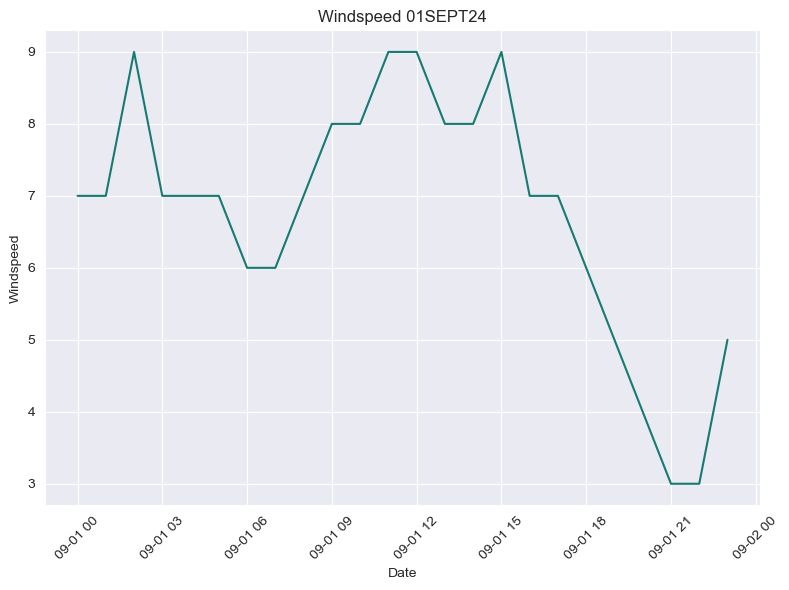

In [124]:
dateFrom = "2024-09-01 00:00:00"
dateTo = "2024-09-01 23:59:00"
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=rolling_windspeed.loc[dateFrom:dateTo]).set(title="Windspeed 01SEPT24",xlabel="Date",ylabel="Windspeed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\curleys\AppData\Local\Temp\ipykernel_24016\4182274831.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_avg =  rolling_windspeed.rolling(window='24H').mean()


date
1996-04-10 14:00:00    0.000000
1996-07-31 08:00:00    0.000000
1996-07-31 09:00:00    0.000000
1996-07-31 10:00:00    0.000000
1996-07-31 11:00:00    0.000000
                         ...   
2024-10-31 20:00:00    5.916667
2024-10-31 21:00:00    5.791667
2024-10-31 22:00:00    5.583333
2024-10-31 23:00:00    5.500000
2024-11-01 00:00:00    5.500000
Name: wdsp, Length: 247624, dtype: float64


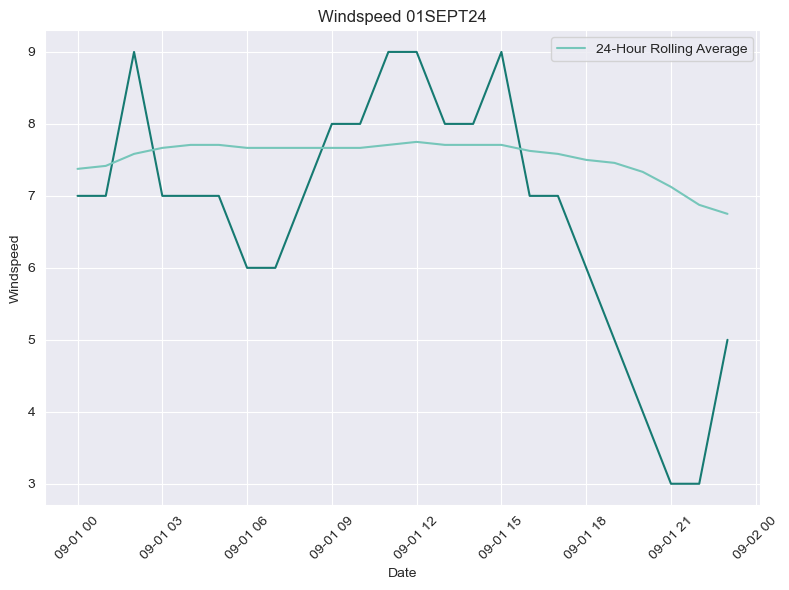

In [123]:
dateFrom = "2024-09-01 00:00:00"
dateTo = "2024-09-01 23:59:00"
rolling_avg =  rolling_windspeed.rolling(window='24H').mean()
print (rolling_avg)
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=rolling_windspeed.loc[dateFrom:dateTo]).set(title="Windspeed 01SEPT24",xlabel="Date",ylabel="Windspeed")
sns.lineplot(data=rolling_avg.loc[dateFrom:dateTo], label='24-Hour Rolling Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5.2.3 The max windspeed for each day

date
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
              ... 
2024-10-28    14.0
2024-10-29     6.0
2024-10-30     9.0
2024-10-31     9.0
2024-11-01     6.0
Name: wdsp, Length: 10322, dtype: float64


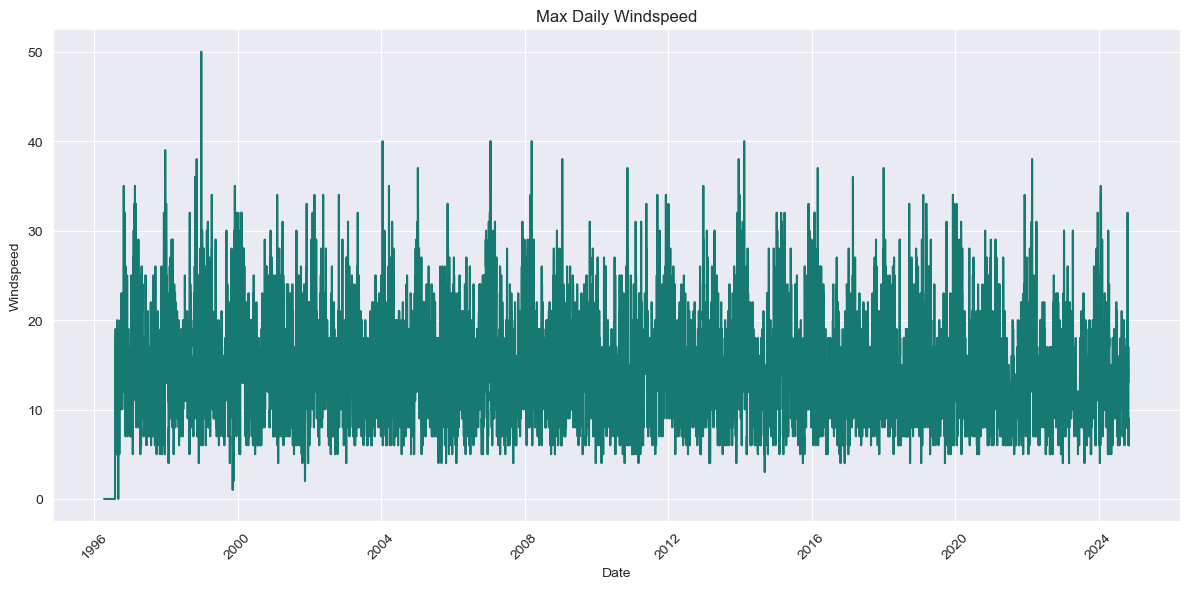

In [122]:
max_windspeed = df["wdsp"].resample("D").max().dropna()
print(max_windspeed)
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=max_windspeed).set(title="Max Daily Windspeed",xlabel="Date",ylabel="Windspeed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5.2.4 The monthly mean of the daily max windspeeds

C:\Users\curleys\AppData\Local\Temp\ipykernel_24016\4145070357.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = max_windspeed.resample('M').mean()


date
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
                ...    
2024-07-31    11.483871
2024-08-31    14.451613
2024-09-30    12.266667
2024-10-31    13.064516
2024-11-30     6.000000
Freq: ME, Name: wdsp, Length: 344, dtype: float64


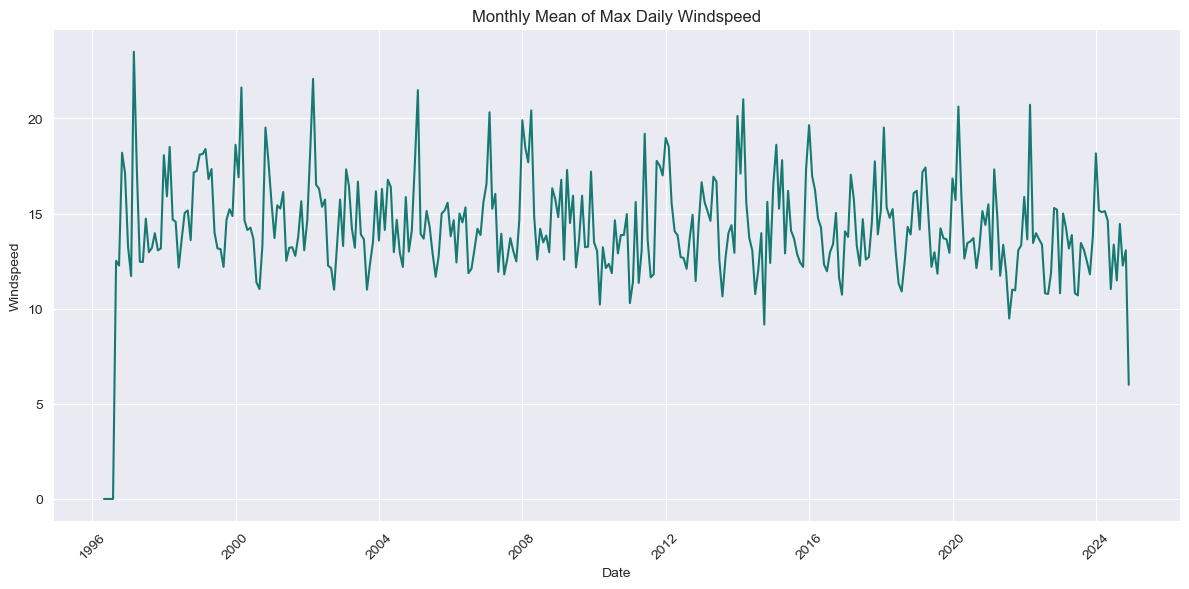

In [121]:
monthly_mean = max_windspeed.resample('M').mean()
print(monthly_mean)
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.set_palette("BrBG_r")
sns.lineplot(data=monthly_mean).set(title="Monthly Mean of Max Daily Windspeed",xlabel="Date",ylabel="Windspeed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6.   References

***

- Topic 6 Lecture videos and notebook
	    
   - L1-introduction_datetime.ipynb
    
   - L2-Timeseries in pandas.ipynb
    
   - L3-creating data.ipynb
- Python Doc: Datetime – Basic date & time types       https://docs.python.org/3/library/datetime.html
- w3schools Python Date    https://www.w3schools.com/python/python_datetime.asp
- Real Python: Using Python datetime to Work With Dates and Times     https://realpython.com/python-datetime/
- Python Tutorial.net: Python datetime     https://www.pythontutorial.net/python-standard-library/python-datetime/
- Dataquest: Python Datetime Tutorial: Manipulate Times, Dates, and Time Spans     https://www.dataquest.io/blog/python-datetime-tutorial/
- Datagy: DateTime in Pandas and Python     https://datagy.io/pandas-datetime/
- Python Doc: Datetime – pandas.to_datetime       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
- Geeks For Geeks: Python | Pandas.to_datetime()       https://www.geeksforgeeks.org/python-pandas-to_datetime/
- w3schools Pandas DataFrame loc Property      https://www.w3schools.com/python/pandas/ref_df_loc.asp
- Geeks For Geeks: Python | Pandas DataFrame.set_index()       https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/
- Real Python: Slicing and Dicing With .loc[]      https://realpython.com/lessons/slicing-and-dicing-with-loc/
- Pandas Pydata: Datetime – pandas.DataFrame.resample     https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
- SlingAcademy: Basic Resampling: Aggregating Daily to Monthly Data     https://www.slingacademy.com/article/pandas-using-dataframe-resample-method-with-examples/?utm_content=cmp-true
- Scaler.com: Resampling, Rolling Calculations, and Differencing in Pandas     https://www.scaler.com/topics/pandas/resampling-in-pandas/
- Datagy: Pandas dropna(): Drop Missing Records and Columns in DataFrames      https://datagy.io/pandas-dropna/
- SlingAcademy: Using DataFrame.dropna() method in Pandas     https://www.slingacademy.com/article/using-dataframe-dropna-method-in-pandas/
- Pandas Pydata: pandas.Series.str.strip       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html
- Geeks For Geeks: Python | Python | Pandas Series.str.strip(), lstrip() and rstrip()      https://www.geeksforgeeks.org/python-pandas-series-str-strip-lstrip-and-rstrip/ 
- w3schools: Pandas cleaning empty cells  https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp
- Machine Learning Tutorials: pandas to_numeric Tutorial (With Examples)       https://machinelearningtutorials.org/pandas-to_numeric-tutorial-with-examples/
- Pandas Pydata: pandas.to_numeric     https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.to_numeric.html
- Stack Overflow: Pandas to_numeric       https://stackoverflow.com/questions/69746592/pandas-to-numeric
- Progamiz: Pandas rolling()        https://www.programiz.com/python-programming/pandas/methods/rolling
- Pandas Pydata: pandas.core.resample.Resampler.max          https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.max.html
- Real Python: Visualizing Data in Python With Seaborn    https://realpython.com/python-seaborn/
- Datagy: Seaborn in Python for Data Visualization   https://datagy.io/python-seaborn/
- Seaborn: Choosing color palettes     https://seaborn.pydata.org/tutorial/color_palettes.html


